In [148]:
import pandas as pd
import numpy as np
import pandas_profiling
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)
pd.options.display.float_format = '{:.4f}'.format

In [149]:
basedata_noshow = pd.read_csv("..\..\zReference_Data\medical_appointments_no_shows.csv", 
                              dtype = {"PatientId": "str"} )

In [150]:
# Basic Data Exploration

print(basedata_noshow.columns)
print(f"num of columns: {len(basedata_noshow.columns)}")
print(f"num of rows: {len(basedata_noshow)}")
print("\n")
print(basedata_noshow.dtypes)
print("\n")

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'], dtype='object')
num of columns: 14
num of rows: 110527


PatientId         object
AppointmentID     int64 
Gender            object
ScheduledDay      object
AppointmentDay    object
Age               int64 
Neighbourhood     object
Scholarship       int64 
Hipertension      int64 
Diabetes          int64 
Alcoholism        int64 
Handcap           int64 
SMS_received      int64 
No-show           object
dtype: object




In [151]:
basedata_noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [152]:
df_des = basedata_noshow.drop(["PatientId", "AppointmentID", "ScheduledDay", "AppointmentDay"], axis=1)
label_encode = LabelEncoder()
label_encode.fit(["No", "Yes"])
df_des["No-show"] = label_encode.transform(df_des["No-show"])
df_des.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,110527.0000,110527.0000,110527.0000,110527.0000,110527.0000,110527.0000,110527.0000,110527.0000
mean,37.0889,0.0983,0.1972,0.0719,0.0304,0.0222,0.3210,0.2019
std,23.1102,0.2977,0.3979,0.2583,0.1717,0.1615,0.4669,0.4014
min,-1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,18.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
50%,37.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,55.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
max,115.0000,1.0000,1.0000,1.0000,1.0000,4.0000,1.0000,1.0000


In [153]:
df_des.describe(exclude=["int64","int32"])

,Gender,Neighbourhood
count,110527,110527
unique,2,81
top,F,JARDIM CAMBURI
freq,71840,7717


In [154]:
pandas_profiling.ProfileReport(df_des)

# Identifying Feature Importances to demonstrate main reasons for not showing up

In [155]:
df_des.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [156]:
# dropping high cardinality values
df_model_data = df_des.drop(["Neighbourhood"], inplace=False, axis=1)
# encoding gender
label_encode = LabelEncoder()
label_encode.fit(list(set(df_model_data["Gender"])))

df_model_data["Gender"] = label_encode.transform(list(df_model_data["Gender"]))

for index,i in enumerate(label_encode.classes_):
    print(f"class: {index} is {i}")

class: 0 is F
class: 1 is M


# Model Training

In [157]:
# Splitting train test data 
y_data = df_model_data["No-show"]
X_data = df_model_data.drop("No-show", inplace=False, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.4, random_state=0)

In [147]:
# training model
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [158]:
feature_impt_dict = {}
feature_impt_values = clf.feature_importances_
for index, feature in enumerate(list(X_data.columns)):
    feature_impt_dict[feature] = feature_impt_values[index]
    
    
feature_impt_dict = dict(sorted(feature_impt_dict.items(), key=lambda x: x[1], reverse=True))
feature_impt_dict

{'Age': 0.7057639339817313,
 'SMS_received': 0.17938402150454977,
 'Handcap': 0.02222054844621682,
 'Gender': 0.020932966440107,
 'Hipertension': 0.020229302683098523,
 'Scholarship': 0.01878643468359339,
 'Alcoholism': 0.017394174531410567,
 'Diabetes': 0.015288617729292645}

In [159]:
yaxis_names = list(feature_impt_dict.keys())
xaxis_values = list(feature_impt_dict.values())

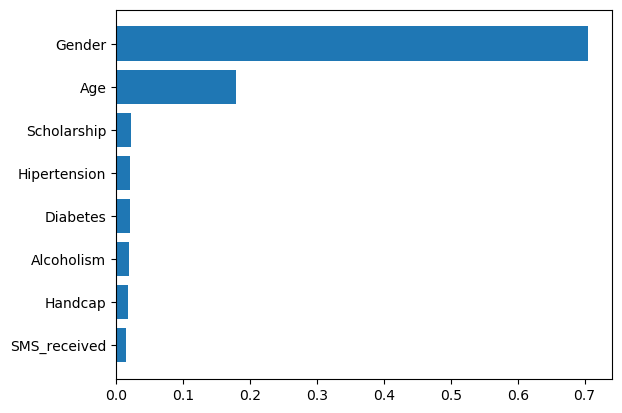

In [160]:
plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(len(list(yaxis_names)))

ax.barh(y_pos, xaxis_values, align="center")
ax.set_yticks(y_pos)
ax.set_yticklabels(list(X_data.columns))
ax.invert_yaxis()